<a href="https://colab.research.google.com/github/yrodriguezmd/IceVision_miniprojects/blob/main/testing_fine_tune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
!bash install_colab.sh

print(torch.__version__)
print(torchvision.__version__)

--2021-08-25 22:33:45--  https://raw.githubusercontent.com/airctic/icevision/master/install_colab.sh
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1244 (1.2K) [text/plain]
Saving to: ‘install_colab.sh’

install_colab.sh    100%[===================>]   1.21K  --.-KB/s    in 0s      

2021-08-25 22:33:45 (102 MB/s) - ‘install_colab.sh’ saved [1244/1244]

Installing icevision + dependencices for CUDA 10
Uninstalling some dependencies to prevent errors
Found existing installation: torchvision 0.10.0+cu102
Uninstalling torchvision-0.10.0+cu102:
  Successfully uninstalled torchvision-0.10.0+cu102
Found existing installation: fastai 1.0.61
Uninstalling fastai-1.0.61:
  Successfully uninstalled fastai-1.0.61
Installing some dependencies to prevent errors
     |███

In [1]:
from icevision.all import *
import icedata
#import icevision
#print(icevision.__version__)

path = icedata.pets.load_data()

class_map = icedata.pets.class_map()

data_splitter = RandomSplitter([0.8, 0.2])

parser = icedata.pets.parser(data_dir=path)# removed mask

train_records, valid_records = parser.parse(data_splitter)

INFO     - Downloading default `.ttf` font file - SpaceGrotesk-Medium.ttf from https://raw.githubusercontent.com/airctic/storage/master/SpaceGrotesk-Medium.ttf to /root/.icevision/fonts/SpaceGrotesk-Medium.ttf | icevision.visualize.utils:get_default_font:69
INFO     - Downloading mmdet configs | icevision.models.mmdet.download_configs:download_mmdet_configs:31


0B [00:00, ?B/s]

  0%|          | 0/791918971 [00:00<?, ?B/s]

  0%|          | 0/19173078 [00:00<?, ?B/s]

  0%|          | 0/3686 [00:00<?, ?it/s]

INFO     - Autofixing records | icevision.parsers.parser:parse:136


  0%|          | 0/2948 [00:00<?, ?it/s]

  0%|          | 0/738 [00:00<?, ?it/s]

In [2]:
image_size = 384
train_tfms = tfms.A.Adapter([*tfms.A.aug_tfms(size=image_size, presize=512), tfms.A.Normalize()])
valid_tfms = tfms.A.Adapter([*tfms.A.resize_and_pad(image_size), tfms.A.Normalize()])

train_ds = Dataset(train_records, train_tfms)
valid_ds = Dataset(valid_records, valid_tfms)

In [4]:
metrics = [COCOMetric(metric_type=COCOMetricType.bbox)]

In [ ]:
#### side project fine_tune cumulative?

In [9]:
import matplotlib.pyplot as plt
def plot_metrics(learn, title, x, y):
  plt.plot(L(learn.recorder.values).itemgot())#
  plt.xlabel('epoch')
  plt.ylabel('mAP (green), Loss (blue, orange)')
  plt.title(title)
  plt.text(x, y, 'Legend: mAP(green), train_loss(blue), valid_loss(orange');

In [6]:
# using retinanet/ resnet50: focal loss
model_type_ret = models.mmdet.retinanet #
backbone_r50 = model_type_ret.backbones.resnet50_fpn_1x(pretrained=True)#
model_ret = model_type_ret.model(backbone=backbone_r50(pretrained=True), #
                      num_classes=len(parser.class_map))

train_dl_ret = model_type_ret.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)#
valid_dl_ret = model_type_ret.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)#

learn_ret = model_type_ret.fastai.learner(dls=[train_dl_ret, valid_dl_ret], model=model_ret, metrics=metrics)#
#learn_ret.lr_find()#
# use ***

  0%|          | 0/152149505 [00:00<?, ?B/s]

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([333, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([333]).


In [7]:
learn_ret.fine_tune(3, 0.00012, freeze_epochs=1) #

epoch,train_loss,valid_loss,COCOMetric,time
0,0.885305,0.738110,0.071786,01:38


epoch,train_loss,valid_loss,COCOMetric,time
0,0.631863,0.579138,0.227640,01:43
1,0.508577,0.465558,0.376020,01:37
2,0.450621,0.433971,0.414720,01:37


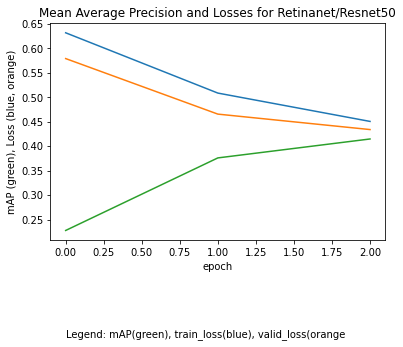

In [10]:
 plot_metrics(learn_ret, 'Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)

In [11]:
# 2nd fine tune
learn_ret.fine_tune(3, 0.00012, freeze_epochs=1) #
## continuation from prior?

epoch,train_loss,valid_loss,COCOMetric,time
0,0.475929,0.449610,0.432463,01:27


epoch,train_loss,valid_loss,COCOMetric,time
0,0.439045,0.404363,0.500039,01:36
1,0.388750,0.372058,0.568475,01:36
2,0.352186,0.346571,0.606487,01:35


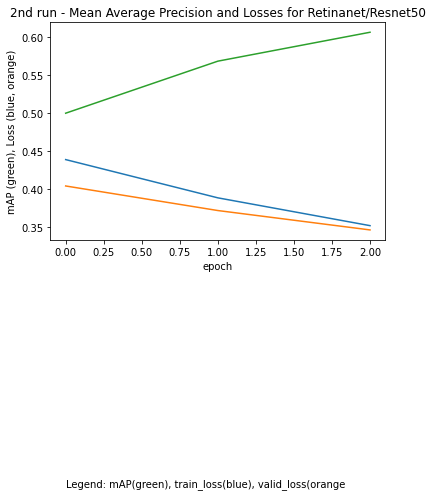

In [12]:
 plot_metrics(learn_ret, '2nd run - Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)

In [13]:
# 3rd run
learn_ret.fine_tune(3, 0.00012, freeze_epochs=1) #

epoch,train_loss,valid_loss,COCOMetric,time
0,0.378452,0.419991,0.539947,01:26


epoch,train_loss,valid_loss,COCOMetric,time
0,0.369953,0.379993,0.579699,01:35
1,0.343431,0.320099,0.662186,01:34
2,0.300995,0.301165,0.682112,01:34


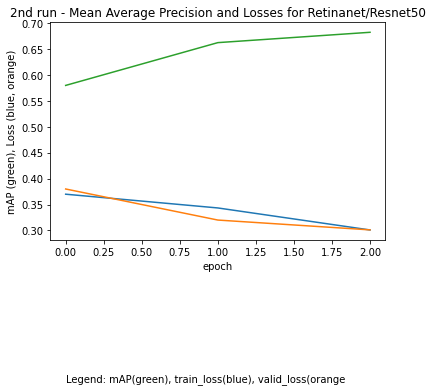

In [14]:
 plot_metrics(learn_ret, '2nd run - Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)

In [ ]:
# Finding:  cumulative

In [15]:
# 1st run
model_type_ret = models.mmdet.retinanet #
backbone_r50 = model_type_ret.backbones.resnet50_fpn_1x(pretrained=True)#
model_ret = model_type_ret.model(backbone=backbone_r50(pretrained=True), #
                      num_classes=len(parser.class_map))

train_dl_ret = model_type_ret.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)#
valid_dl_ret = model_type_ret.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)#

learn_ret = model_type_ret.fastai.learner(dls=[train_dl_ret, valid_dl_ret], model=model_ret, metrics=metrics)#

learn_ret.fine_tune(3, 0.00012, freeze_epochs=1) #

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([333, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([333]).


epoch,train_loss,valid_loss,COCOMetric,time
0,0.866617,0.729996,0.077778,01:32


epoch,train_loss,valid_loss,COCOMetric,time
0,0.624622,0.546720,0.229606,01:40
1,0.507447,0.452356,0.396525,01:38
2,0.445417,0.420490,0.458363,01:37


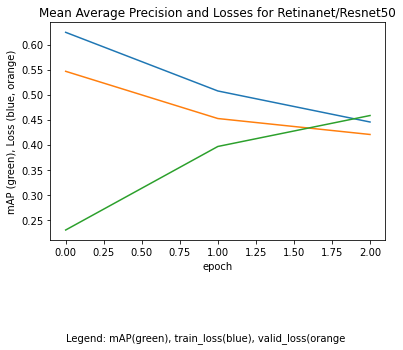

In [16]:
 plot_metrics(learn_ret, 'Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)

In [17]:
# 2nd run
model_type_ret = models.mmdet.retinanet #
backbone_r50 = model_type_ret.backbones.resnet50_fpn_1x(pretrained=True)#
model_ret = model_type_ret.model(backbone=backbone_r50(pretrained=True), #
                      num_classes=len(parser.class_map))

train_dl_ret = model_type_ret.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)#
valid_dl_ret = model_type_ret.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)#

learn_ret = model_type_ret.fastai.learner(dls=[train_dl_ret, valid_dl_ret], model=model_ret, metrics=metrics)#

learn_ret.fine_tune(3, 0.00012, freeze_epochs=1) #

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([333, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([333]).


epoch,train_loss,valid_loss,COCOMetric,time
0,0.875697,0.764025,0.070503,01:33


epoch,train_loss,valid_loss,COCOMetric,time
0,0.631249,0.568328,0.220269,01:40
1,0.514557,0.476069,0.349182,01:38
2,0.459442,0.439911,0.395777,01:37


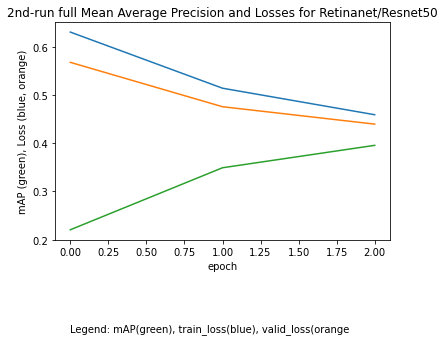

In [18]:
 plot_metrics(learn_ret, '2nd-run full Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)

In [19]:
# 3rd run
model_type_ret = models.mmdet.retinanet #
backbone_r50 = model_type_ret.backbones.resnet50_fpn_1x(pretrained=True)#
model_ret = model_type_ret.model(backbone=backbone_r50(pretrained=True), #
                      num_classes=len(parser.class_map))

train_dl_ret = model_type_ret.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)#
valid_dl_ret = model_type_ret.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)#

learn_ret = model_type_ret.fastai.learner(dls=[train_dl_ret, valid_dl_ret], model=model_ret, metrics=metrics)#

learn_ret.fine_tune(3, 0.00012, freeze_epochs=1) #

#learn_ret.lr_find()#
## if don't restart, starts at high map --> accumulated?

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([333, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([333]).


epoch,train_loss,valid_loss,COCOMetric,time
0,0.867833,0.737112,0.083764,01:33


epoch,train_loss,valid_loss,COCOMetric,time
0,0.621873,0.556343,0.256905,01:41
1,0.507060,0.470288,0.378525,01:38
2,0.444856,0.428171,0.445341,01:37


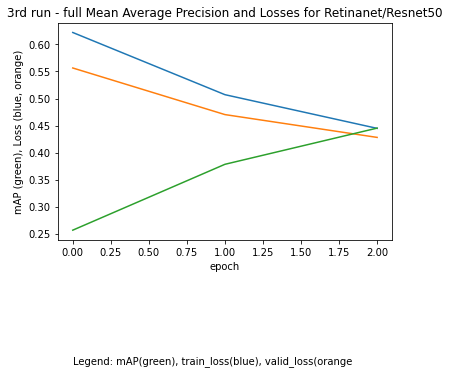

In [20]:
 plot_metrics(learn_ret, '3rd run - full Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)

In [ ]:
# Finding: baseline, learn reset at each run

In [ ]:
#  next: see if lr_find changes with each iteration

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([333, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([333]).


SuggestedLRs(lr_min=3.981071640737355e-05, lr_steep=0.0003311311302240938)

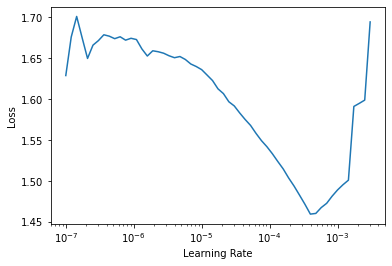

In [24]:
# using retinanet/ resnet50: focal loss
model_type_ret = models.mmdet.retinanet #
backbone_r50 = model_type_ret.backbones.resnet50_fpn_1x(pretrained=True)#
model_ret = model_type_ret.model(backbone=backbone_r50(pretrained=True), #
                      num_classes=len(parser.class_map))

train_dl_ret = model_type_ret.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)#
valid_dl_ret = model_type_ret.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)#

learn_ret = model_type_ret.fastai.learner(dls=[train_dl_ret, valid_dl_ret], model=model_ret, metrics=metrics)#
learn_ret.lr_find()#
# use ***

In [25]:
# 1st run
learn_ret.fine_tune(3, 3.981071640737355e-05, freeze_epochs=1) #


epoch,train_loss,valid_loss,COCOMetric,time
0,0.991052,0.803205,0.050723,01:34


epoch,train_loss,valid_loss,COCOMetric,time
0,0.723789,0.669747,0.093637,01:43
1,0.629509,0.584949,0.181908,01:42
2,0.586359,0.569237,0.210489,01:41


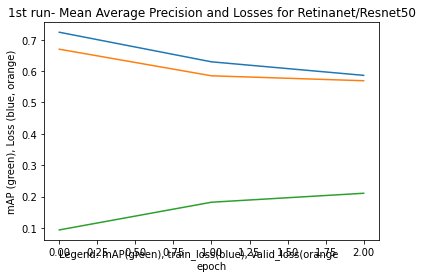

In [26]:
 plot_metrics(learn_ret, '1st run- Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)

SuggestedLRs(lr_min=5.754399353463669e-07, lr_steep=1.5848931980144698e-06)

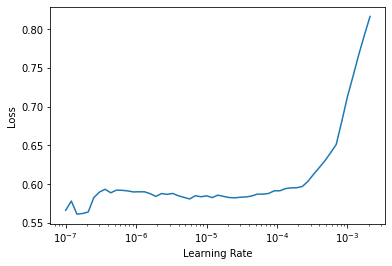

In [27]:
#2nd run
learn_ret.lr_find()#


In [28]:
# 2nd run
learn_ret.fine_tune(3, 1e-5, freeze_epochs=1) #


epoch,train_loss,valid_loss,COCOMetric,time
0,0.583649,0.555875,0.229365,01:32


epoch,train_loss,valid_loss,COCOMetric,time
0,0.565111,0.540557,0.245409,01:41
1,0.554450,0.535192,0.261858,01:41
2,0.542291,0.523560,0.272261,01:40


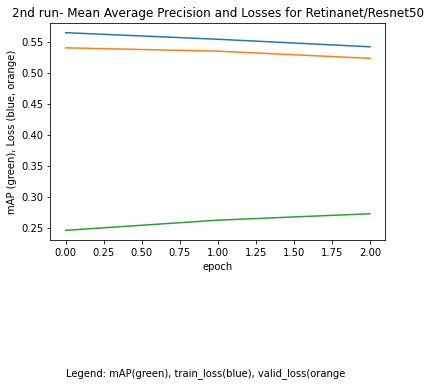

In [29]:
 # 2nd run
 plot_metrics(learn_ret, '2nd run- Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=4.786300905834651e-06)

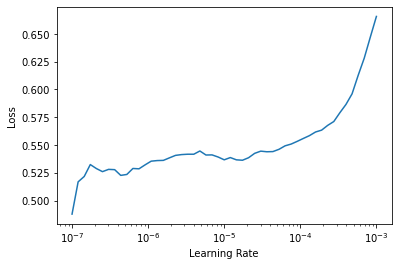

In [30]:
# 3rd run
learn_ret.lr_find()#


In [31]:
# 3rd run
learn_ret.fine_tune(3, 1e-6, freeze_epochs=1) #


epoch,train_loss,valid_loss,COCOMetric,time
0,0.533509,0.521496,0.274555,01:31


epoch,train_loss,valid_loss,COCOMetric,time
0,0.536507,0.520570,0.276359,01:40
1,0.535959,0.517687,0.279339,01:41
2,0.537849,0.517783,0.280043,01:41


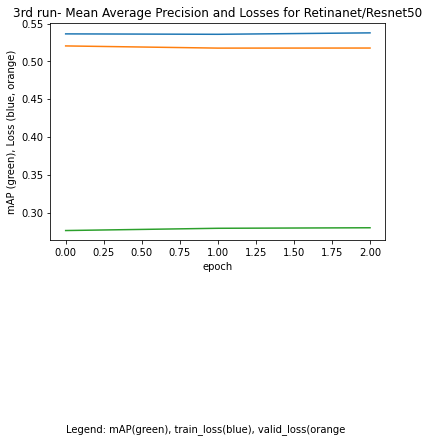

In [34]:
# 3rd run
plot_metrics(learn_ret, 
              '3rd run- Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)

In [ ]:
# Finding:  LR goes smaller and smaller
#    if adjust lr everytime to smaller values, learning decreases

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([333, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([333]).


SuggestedLRs(lr_min=8.317637839354575e-05, lr_steep=0.00013182566908653826)

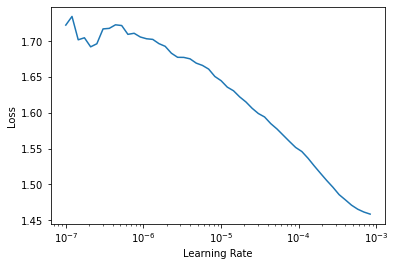

In [36]:
# 1st run
model_type_ret = models.mmdet.retinanet #
backbone_r50 = model_type_ret.backbones.resnet50_fpn_1x(pretrained=True)#
model_ret = model_type_ret.model(backbone=backbone_r50(pretrained=True), #
                      num_classes=len(parser.class_map))

train_dl_ret = model_type_ret.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)#
valid_dl_ret = model_type_ret.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)#

learn_ret = model_type_ret.fastai.learner(dls=[train_dl_ret, valid_dl_ret], model=model_ret, metrics=metrics)#

learn_ret.lr_find()

In [37]:
learn_ret.fine_tune(3, 1e-4, freeze_epochs=1) #

epoch,train_loss,valid_loss,COCOMetric,time
0,0.878591,0.724653,0.075082,01:36


epoch,train_loss,valid_loss,COCOMetric,time
0,0.637661,0.599846,0.192262,01:41
1,0.532042,0.485529,0.353599,01:39
2,0.460732,0.447929,0.412514,01:38


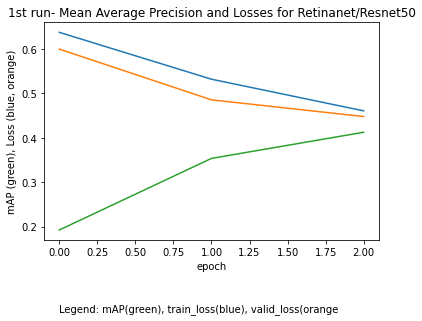

In [38]:
 plot_metrics(learn_ret, '1st run- Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([333, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([333]).


SuggestedLRs(lr_min=0.00012022644514217973, lr_steep=0.00013182566908653826)

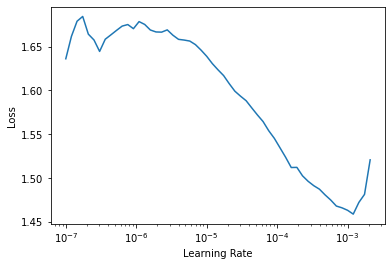

In [39]:
# 2nd run
model_type_ret = models.mmdet.retinanet #
backbone_r50 = model_type_ret.backbones.resnet50_fpn_1x(pretrained=True)#
model_ret = model_type_ret.model(backbone=backbone_r50(pretrained=True), #
                      num_classes=len(parser.class_map))

train_dl_ret = model_type_ret.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)#
valid_dl_ret = model_type_ret.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)#

learn_ret = model_type_ret.fastai.learner(dls=[train_dl_ret, valid_dl_ret], model=model_ret, metrics=metrics)#

learn_ret.lr_find()

In [40]:
learn_ret.fine_tune(3,0.000120 , freeze_epochs=1) #

epoch,train_loss,valid_loss,COCOMetric,time
0,0.879835,0.755599,0.071730,01:34


epoch,train_loss,valid_loss,COCOMetric,time
0,0.629463,0.605008,0.219114,01:41
1,0.506781,0.450517,0.402248,01:38
2,0.446536,0.420366,0.455418,01:38


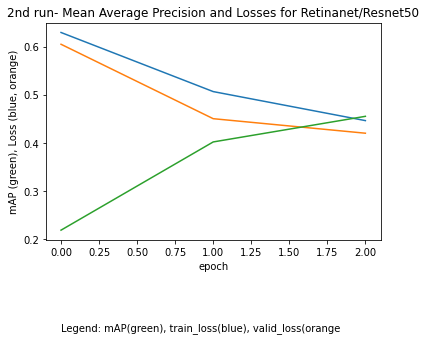

In [41]:
 plot_metrics(learn_ret, '2nd run- Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)

In [ ]:
# Finding:
# resetting to baseline also resets lr_find

In [42]:
# 3rd run
model_type_ret = models.mmdet.retinanet #
backbone_r50 = model_type_ret.backbones.resnet50_fpn_1x(pretrained=True)#
model_ret = model_type_ret.model(backbone=backbone_r50(pretrained=True), #
                      num_classes=len(parser.class_map))

train_dl_ret = model_type_ret.train_dl(train_ds, batch_size=16, num_workers=4, shuffle=True)#
valid_dl_ret = model_type_ret.valid_dl(valid_ds, batch_size=16, num_workers=4, shuffle=False)#

learn_ret = model_type_ret.fastai.learner(dls=[train_dl_ret, valid_dl_ret], model=model_ret, metrics=metrics)#

learn_ret.lr_find()

/usr/local/lib/python3.7/dist-packages/mmcv/cnn/utils/weight_init.py:119: UserWarning: init_cfg without layer key, if you do not define override key either, this init_cfg will do nothing
  'init_cfg without layer key, if you do not define override'


Use load_from_local loader
The model and loaded state dict do not match exactly

size mismatch for bbox_head.retina_cls.weight: copying a param with shape torch.Size([720, 256, 3, 3]) from checkpoint, the shape in current model is torch.Size([333, 256, 3, 3]).
size mismatch for bbox_head.retina_cls.bias: copying a param with shape torch.Size([720]) from checkpoint, the shape in current model is torch.Size([333]).


NameError: ignored

In [ ]:
learn_ret.fine_tune(3, , freeze_epochs=1) #

In [ ]:
 plot_metrics(learn_ret, '3rd run- Mean Average Precision and Losses for Retinanet/Resnet50', 0, 0.01)